# Preprocessing Data for Neural Networks -Reducing Overfitting with Dropout

In [1]:
# Load libraries
from sklearn import preprocessing
import numpy as np
# Load libraries
from keras import models
from keras import layers


Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:522: FutureWarn

In [2]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 1000


In [4]:
# save np.load
np_load_old = np.load
# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)
np.load = np_load_old
# Convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")


/anaconda3/lib/python3.6/site-packages/keras/datasets/imdb.py:99: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/anaconda3/lib/python3.6/site-packages/keras/datasets/imdb.py:100: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
# Start neural network
network = models.Sequential()
# Add a dropout layer for input layer
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric

In [6]:
# Train neural network
history = network.fit(features_train, # Features
target_train, # Target vector
epochs=20, # Number of epochs
verbose=1, # Print description after each epoch
batch_size=100, # Number of observations per batch
validation_data=(features_test, target_test)) # Test data

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 66us/step - loss: 0.6388 - acc: 0.6246 - val_loss: 0.5142 - val_acc: 0.8234
Epoch 2/20
25000/25000 [==============================] - 2s 68us/step - loss: 0.5106 - acc: 0.7722 - val_loss: 0.3951 - val_acc: 0.8454
Epoch 3/20
25000/25000 [==============================] - 1s 47us/step - loss: 0.4613 - acc: 0.8035 - val_loss: 0.3639 - val_acc: 0.8539
Epoch 4/20
25000/25000 [==============================] - 1s 42us/step - loss: 0.4322 - acc: 0.8196 - val_loss: 0.3455 - val_acc: 0.8582
Epoch 5/20
25000/25000 [==============================] - 1s 40us/step - loss: 0.4236 - acc: 0.8218 - val_loss: 0.3388 - val_acc: 0.8596
Epoch 6/20
25000/25000 [==============================] - 2s 69us/step - loss: 0.4118 - acc: 0.8279 - val_loss: 0.3379 - val_acc: 0.8597
Epoch 7/20
25000/25000 [==============================] - 1s 57us/step - loss: 0.4011 - acc: 0.8364 - val_loss: 0.3381 - val_acc

# Visualize Training History

In [7]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

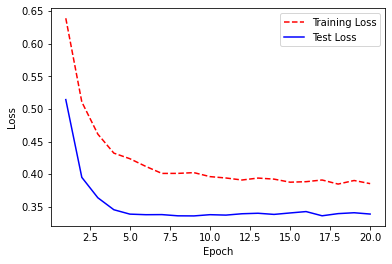

In [8]:
import matplotlib.pyplot as plt
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()